# Fifa 2023 Complete Player Dataset

## Set Path Datasets

In [1]:
%load_ext autoreload
%autoreload 2

%load_ext sql

In [2]:
import os
import sys
import time
import warnings

import pandas as pd

setPath = os.path.join(os.getenv('LinkPaths'), 'arrowSEnvs')
if setPath not in sys.path: sys.path.append(setPath)

from setupEnv import setupEnv
setupEnv.setPaths()
arrowDb = setupEnv.pathAt.get('path1')
dataset = setupEnv.pathAt.get('dataset')
database = setupEnv.pathAt.get('database')

import arrowDb
from arrowDb.sets import SetPathFiles # type: ignore

datasetLists = SetPathFiles.list_files_path(dataset,'csv', getr=True)
FIFA23ConnDb = arrowDb.JunctDbase('duckdb',conn_typesub='duckdb',
                        file_dbase='fifa23completeplayer.duckdb',
                        folder_path=database)
databaseLists = SetPathFiles.list_files_path(database,'duckdb', getp=False)
os.environ['FIFA23ddbStr'] = FIFA23ConnDb.conn('conn string')
# %sql $FIFA23ddbStr

Files in path folder (extensions: csv):


female_coaches.csv - 0.01MB (5.23e+00 KB)
female_players.csv - 89.85MB (9.20e+04 KB)
female_players_legacy.csv - 1.61MB (1.65e+03 KB)
female_teams.csv - 2.11MB (2.16e+03 KB)
male_coaches.csv - 0.13MB (1.30e+02 KB)
male_players.csv - 5.25 GB (5.50e+06 KB)
male_players_legacy.csv - 86.72MB (8.88e+04 KB)
male_players_output.csv - 5.22 GB (5.48e+06 KB)
male_teams.csv - 107.52MB (1.10e+05 KB)


Instance of the object has been created.
Connection (duckdb) to 'fifa23completeplayer.duckdb' database, 'Open Connection' Successfully.


## Import data to table DuckDB database

### table 'male_players'

#### List File database in dataset path

In [3]:
SetPathFiles.list_files_path(database,'duckdb')

Files in path folder (extensions: duckdb):


fifa23completeplayer.duckdb - 0.01MB (1.20e+01 KB)


#### Import 'male_players.csv' in to 'male_players', 'fifa23completeplayer.duckdb' Database

In [4]:
FIFA23ConnDb.query(
    'import file to db',
    path=dataset,
    file='male_players.csv',
    file_type='csv')

File 'male_players.csv'(5.25 GB) to import into 'fifa23completeplayer.duckdb' database file, start...


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

File 'male_players.csv' has been successfully imported into table 'male_players'
Time taken: 100.78 seconds
Peak memory: 7.27 GB
Average memory: 204.66 MB
Total rows and columns: (10003590, 110)


In [5]:
SetPathFiles.list_files_path(database,'duckdb')

Files in path folder (extensions: duckdb):


fifa23completeplayer.duckdb - 1.53 GB (1.60e+06 KB)


In [6]:
FIFA23ConnDb.query("object list")

List for 'table' in 'fifa23completeplayer.duckdb' database:
- male_players (table object)


List for 'view' in 'fifa23completeplayer.duckdb' database:
- [Null] No view object in list


#### 'male_players' table description

In [7]:
FIFA23ConnDb.query('table description',
                        table='male_players',
                        columns='column_name,\
                        ordinal_position,\
                        data_type,\
                        is_nullable')

Description for 'male_players'


,column_name,ordinal_position,data_type,is_nullable
1,player_id,1,BIGINT,YES
2,player_url,2,VARCHAR,YES
3,fifa_version,3,BIGINT,YES
4,fifa_update,4,BIGINT,YES
5,fifa_update_date,5,DATE,YES
...,...,...,...,...
106,cb,106,VARCHAR,YES
107,rcb,107,VARCHAR,YES
108,rb,108,VARCHAR,YES
109,gk,109,VARCHAR,YES


The table result display in 'DataFrame'
Total rows and columns: (110, 4)


#### Preview 'male_players' table

In [8]:
FIFA23ConnDb.query('show table',view='male_players',nrows=5)

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
1,158023,/player/158023/lionel-messi/230009,23,9,2023-01-13,L. Messi,Lionel Andrés Messi Cuccittini,RW,91,91,...,63+3,63+3,64+3,59+3,50+3,50+3,50+3,59+3,19+3,https://cdn.sofifa.net/players/158/023/23_120.png
2,165153,/player/165153/karim-benzema/230009,23,9,2023-01-13,K. Benzema,Karim Benzema,"CF, ST",91,91,...,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3,https://cdn.sofifa.net/players/165/153/23_120.png
3,188545,/player/188545/robert-lewandowski/230009,23,9,2023-01-13,R. Lewandowski,Robert Lewandowski,ST,91,91,...,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/23_120.png
4,192985,/player/192985/kevin-de-bruyne/230009,23,9,2023-01-13,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,79+3,79+3,78+3,74+3,68+3,68+3,68+3,74+3,21+3,https://cdn.sofifa.net/players/192/985/23_120.png
5,231747,/player/231747/kylian-mbappe/230009,23,9,2023-01-13,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,...,63+3,63+3,67+3,63+3,54+3,54+3,54+3,63+3,18+3,https://cdn.sofifa.net/players/231/747/23_120.png


The table result display in 'DataFrame'
Limits the total rows(nrows=) to 5 rows
Total rows and columns: (10003590, 110)


## Create View 

### Create View table form table in 'fifa23completeplayer.duckdb' Database

In [9]:
columns = ['ls','st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']

qstrings = "SELECT"
qstrings += f"""
    CASE 
        WHEN short_name = 'Neymar Jr' THEN 'Neymar'
        ELSE short_name
    END AS short_name,
    """

qstrings += """
    overall,
    league_name,
    club_name,
    club_position,
    value_eur,
    wage_eur,
    age,
    MONTH(fifa_update_date) AS Month,
    YEAR(fifa_update_date) AS Year,
    """
            
for col in columns:
    qstrings += f"""
    CASE 
        WHEN INSTR({col}, '+') > 0 THEN SUBSTR({col}, 1, INSTR({col}, '+') - 1)
        WHEN INSTR({col}, '-') > 0 THEN SUBSTR({col}, 1, INSTR({col}, '-') - 1)
        ELSE {col}
    END AS {col},"""

qstrings += "\nFROM male_players" 
qstrings += "\nWHERE league_name IN ('Premier League', 'La Liga', 'Ligue 1', 'Serie A')"

FIFA23ConnDb.query(
            'create view query',
            view='qv_mplayers_overall_years', 
            qstrings=qstrings, 
            replace=True,
            )

View 'qv_mplayers_overall_years' has been created.
Total rows and columns: (1703025, 37)


In [10]:
FIFA23ConnDb.query("object list", type='view')

List for 'view' in 'fifa23completeplayer.duckdb' database:
- qv_mplayers_overall_years (view object)


### import 'qv_mplayers_overall_years' from database to dataframe

In [11]:
df_mplayers_overall_years = FIFA23ConnDb.query(
                            "get df view",
                            view='qv_mplayers_overall_years',
                            nrows='all')

DataFrame has been successfully created from 'qv_mplayers_overall_years' table/view
	Total rows and columns: (1703025, 37) 



In [12]:
df_mplayers_overall_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703025 entries, 1 to 1703025
Data columns (total 37 columns):
 #   Column         Dtype  
---  ------         -----  
 0   short_name     object 
 1   overall        int64  
 2   league_name    object 
 3   club_name      object 
 4   club_position  object 
 5   value_eur      float64
 6   wage_eur       int64  
 7   age            int64  
 8   Month          int64  
 9   Year           int64  
 10  ls             object 
 11  st             object 
 12  rs             object 
 13  lw             object 
 14  lf             object 
 15  cf             object 
 16  rf             object 
 17  rw             object 
 18  lam            object 
 19  cam            object 
 20  ram            object 
 21  lm             object 
 22  lcm            object 
 23  cm             object 
 24  rcm            object 
 25  rm             object 
 26  lwb            object 
 27  ldm            object 
 28  cdm            object 
 29  rdm           

## Plot the dataframe

### Plot "Top Players by Average Overall Rating"

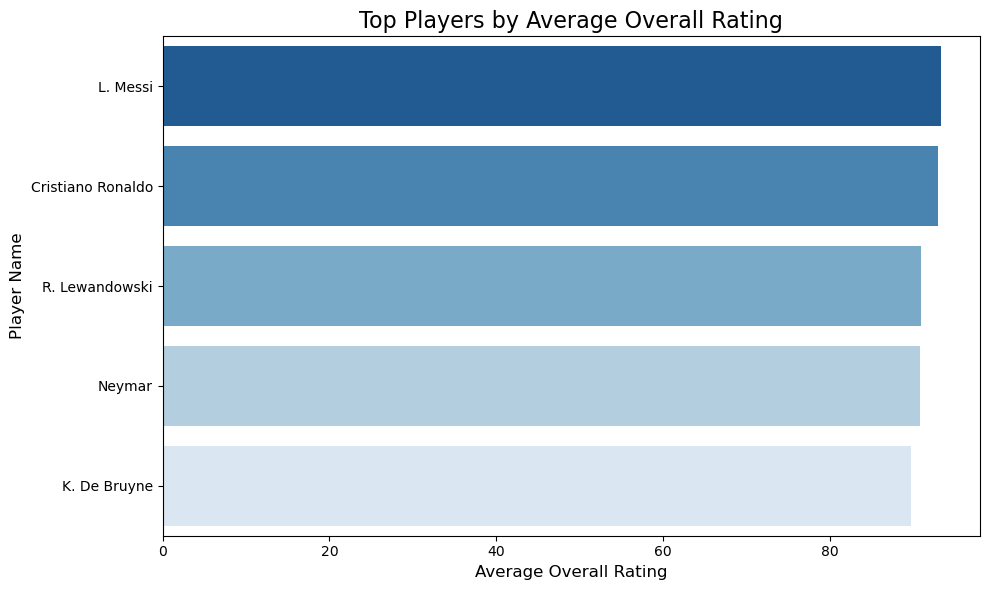

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preparation
df = df_mplayers_overall_years.copy()
df = df.groupby('short_name')['overall'].mean().reset_index()
df = df.sort_values(by='overall', ascending=False).head(5)

# Plotting with Seaborn
plt.figure(figsize=(10, 6))

# Bar plot
sns.barplot(
    data=df,
    x='overall',
    y='short_name',
    palette='Blues_r'
)

# Customizing the plot
plt.title('Top Players by Average Overall Rating', fontsize=16)
plt.xlabel('Average Overall Rating', fontsize=12)
plt.ylabel('Player Name', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Show plot
plt.show()


### Plot "Top Players by Average Overall Rating Over the Years"

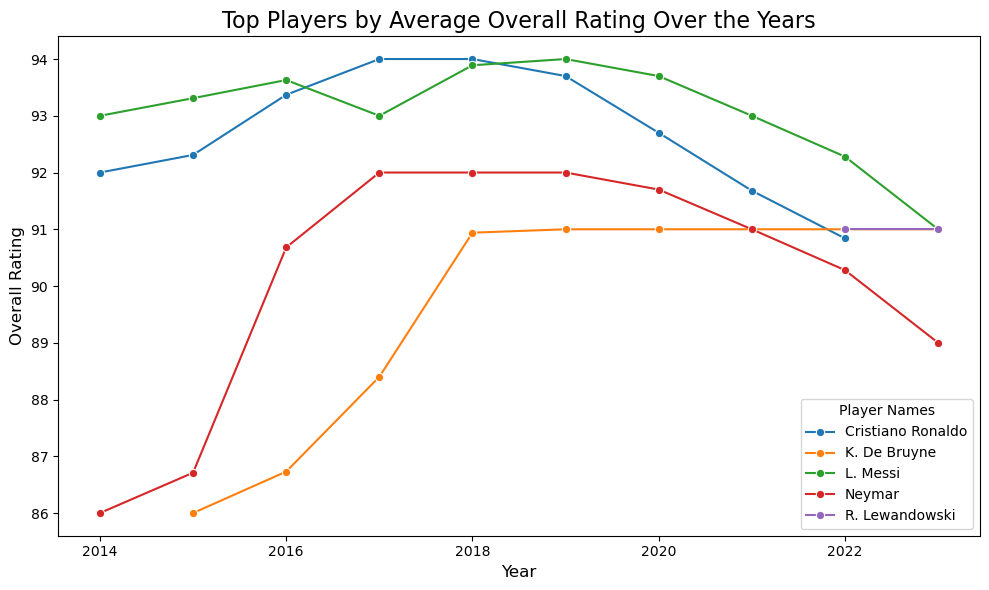

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Data Preparation
df = df_mplayers_overall_years.copy()

df_overall_years = (
    df.groupby(['short_name', 'Year'])['overall']
    .mean()
    .round(2)
    .reset_index(name='avg_overall')
)

df_overall = (
    df.groupby('short_name')['overall']
    .mean()
    .round(2)
    .reset_index(name='avg_overall')
)

df_top_overall = df_overall.sort_values('avg_overall', ascending=False).head(5)
df_top_overall_years = df_overall_years[df_overall_years['short_name'].isin(df_top_overall['short_name'])]

# Plotting with Seaborn
plt.figure(figsize=(10, 6))

# Plotting average overall rating for each top player over the years
sns.lineplot(
    data=df_top_overall_years,
    x='Year',
    y='avg_overall',
    hue='short_name',
    marker='o'
)

# Customizing the plot
plt.title('Top Players by Average Overall Rating Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Overall Rating', fontsize=12)
plt.legend(title='Player Names', fontsize=10)
plt.tight_layout()

# Show plot
plt.show()


In [16]:
df = df_mplayers_overall_years.copy()
df['club_position'].unique()

array(['RCM', 'RW', 'RDM', 'ST', 'LCB', 'GK', 'LW', 'LB', 'RES', 'SUB',
       'RCB', 'CDM', 'LCM', 'CAM', 'RB', 'CM', 'RM', 'LDM', 'LM', 'LWB',
       'CB', 'RAM', 'LS', 'RS', 'RWB', 'LAM', 'CF', 'LF', 'RF'],
      dtype=object)

In [17]:
# Define the mapping for each group
position_mapping = {
    **dict.fromkeys(['ST', 'CF', 'LW', 'LS', 'LF', 'RF', 'RW', 'RS'], 'attack'),
    **dict.fromkeys(['LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LDM', 'CDM', 'RDM'], 'center'),
    **dict.fromkeys(['RWB', 'LB', 'LCB', 'LWB', 'CB', 'RCB', 'RB'], 'defence'),
    **dict.fromkeys(['RES', 'GK'], 'sub')
}

# Apply the mapping to create the new column
df_mplayers_overall_years['club_position_group'] = df_mplayers_overall_years['club_position'].map(position_mapping)

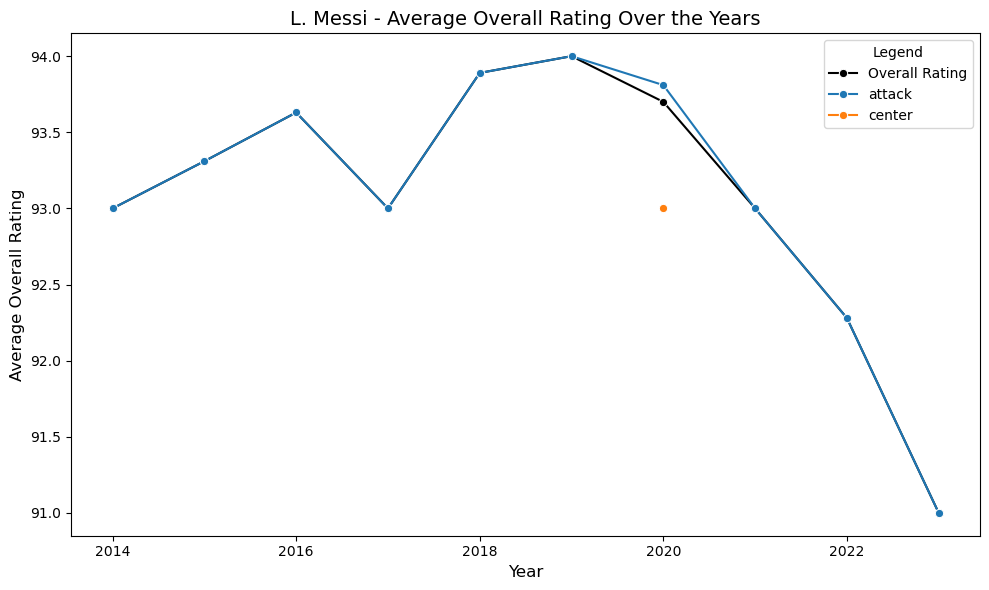

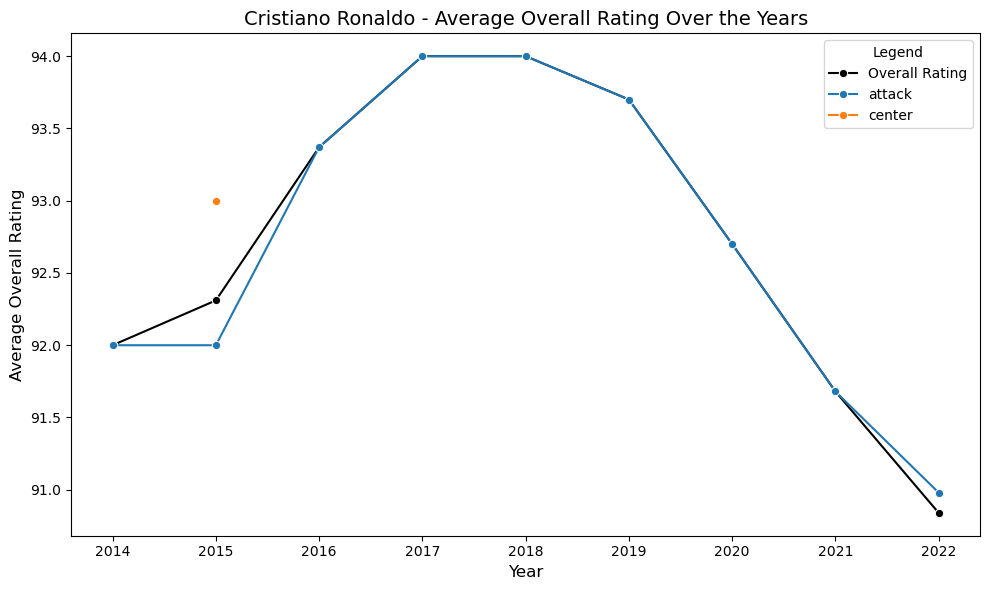

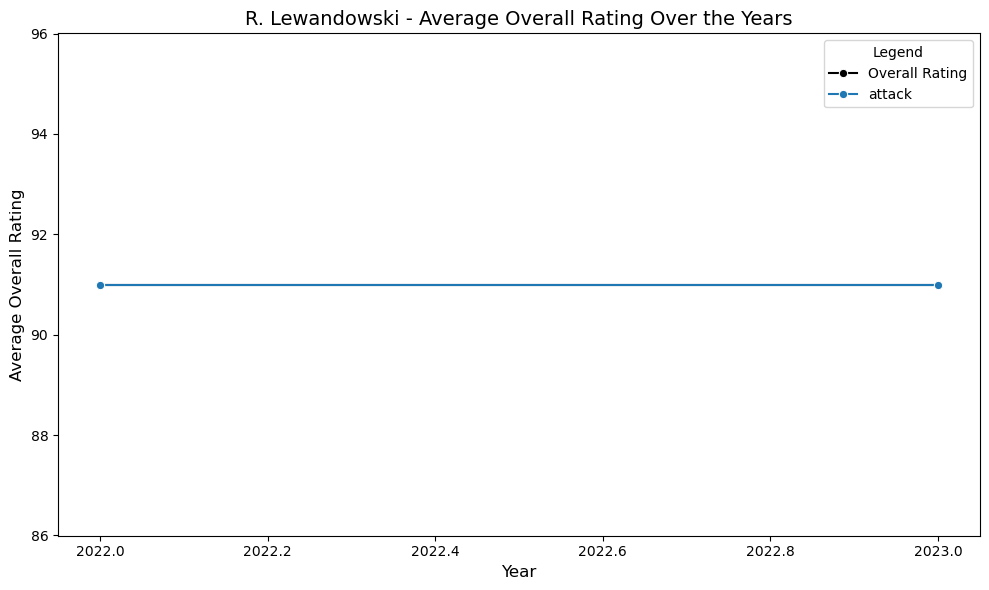

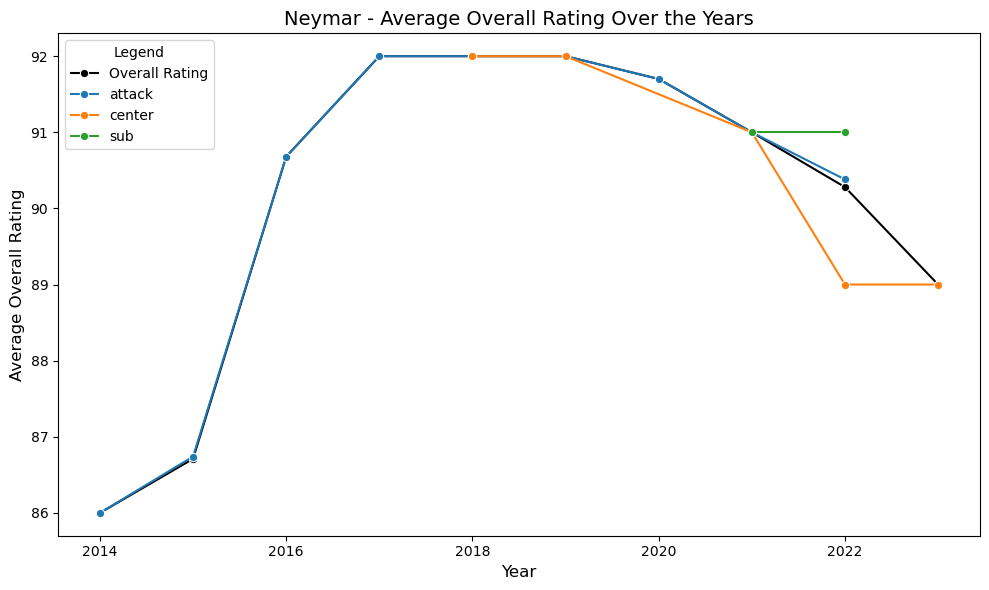

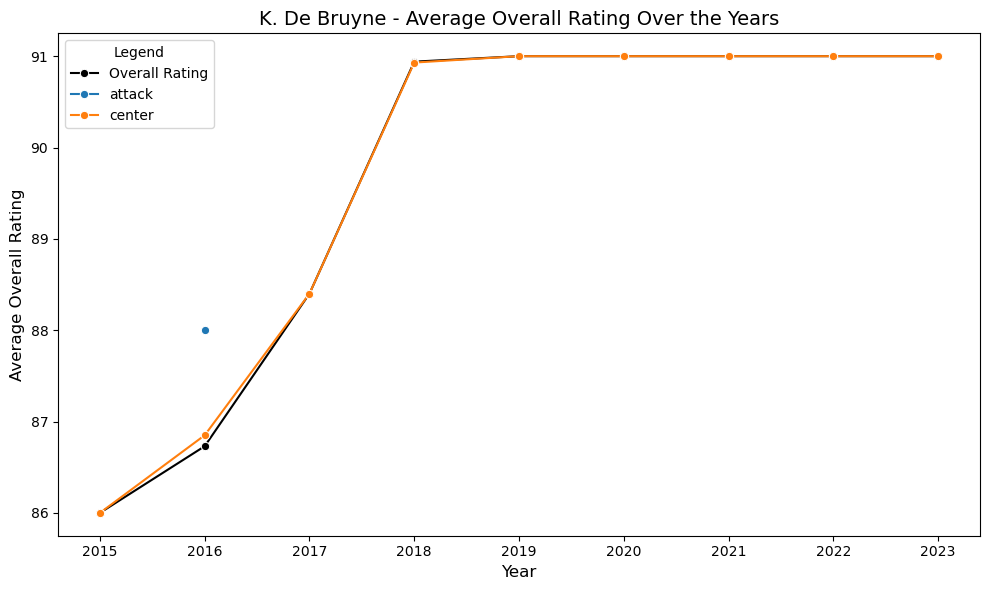

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Data Preparation
df = df_mplayers_overall_years.copy()

df_overall_years = (
    df.groupby(['short_name', 'club_position_group', 'Year'])['overall']
    .mean()
    .round(2)
    .reset_index(name='avg_overall')
)

df_overall = (
    df.groupby(['short_name', 'Year'])['overall']
    .mean()
    .round(2)
    .reset_index(name='avg_overall')
)

df_top_overall = df_overall.groupby('short_name').mean().sort_values('avg_overall', ascending=False).head(5)
df_top_overall_years = df_overall_years[df_overall_years['short_name'].isin(df_top_overall.index)]

warnings.filterwarnings(action='ignore')

# Plotting with Seaborn
for player in df_top_overall.index:
    player_data = df_top_overall_years[df_top_overall_years['short_name'] == player]
    
    # Overall ratings data for the player
    overall_data = df_overall[df_overall['short_name'] == player]
    
    plt.figure(figsize=(10, 6))
    
    # Plot overall ratings
    sns.lineplot(
        data=overall_data,
        x='Year',
        y='avg_overall',
        marker='o',
        label='Overall Rating',
        color='black'
    )
    
    # Plot data for each club position group
    for group in player_data['club_position_group'].unique():
        group_data = player_data[player_data['club_position_group'] == group]
        sns.lineplot(
            data=group_data,
            x='Year',
            y='avg_overall',
            marker='o',
            label=group
        )
    
    # Customizing the plot
    plt.title(f'{player} - Average Overall Rating Over the Years', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Average Overall Rating', fontsize=12)
    plt.legend(title='Legend', fontsize=10)
    plt.tight_layout()
    
    # Show plot
    plt.show()


#### Plot 'Top Players by Value Rating'

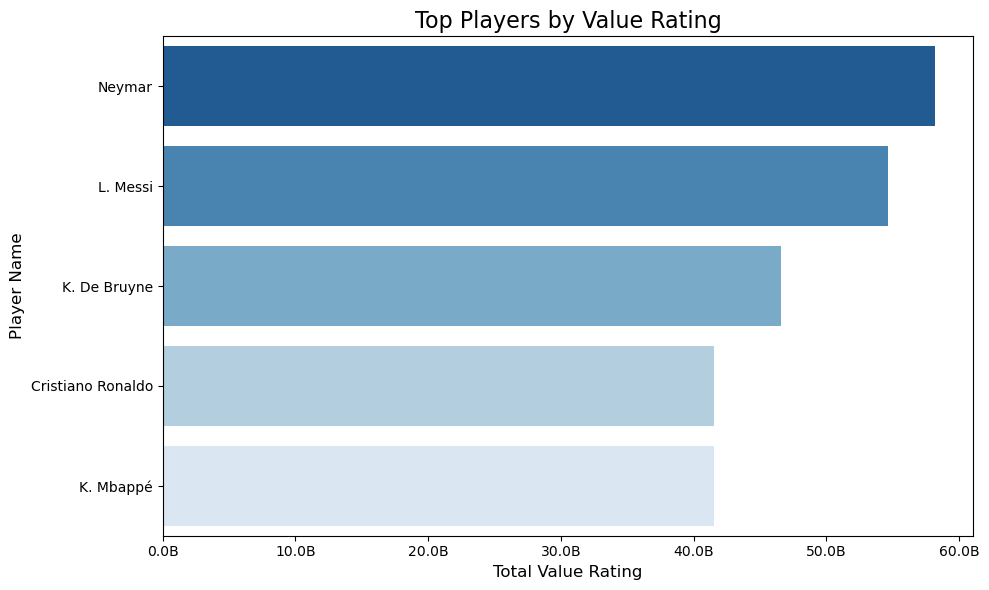

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Data Preparation
df = df_mplayers_overall_years.copy()

df = df.groupby('short_name')['value_eur'].sum().reset_index()
df = df.sort_values(by='value_eur', ascending=False).head(5)

# Plotting with Seaborn
plt.figure(figsize=(10, 6))

# Bar plot
sns.barplot(
    data=df,
    x='value_eur',
    y='short_name',
    palette='Blues_r'
)

# Customizing the plot
plt.title('Top Players by Value Rating', fontsize=16)
plt.xlabel('Total Value Rating', fontsize=12)
plt.ylabel('Player Name', fontsize=12)

# Format x-axis to show billions with 'B'
formatter = FuncFormatter(lambda x, _: f'{x*1e-9:.1f}B')  # Convert to billions (B)
plt.gca().xaxis.set_major_formatter(formatter)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Show plot
plt.show()


#### Plot "Top Players by Sum Value Rating Over the Years"

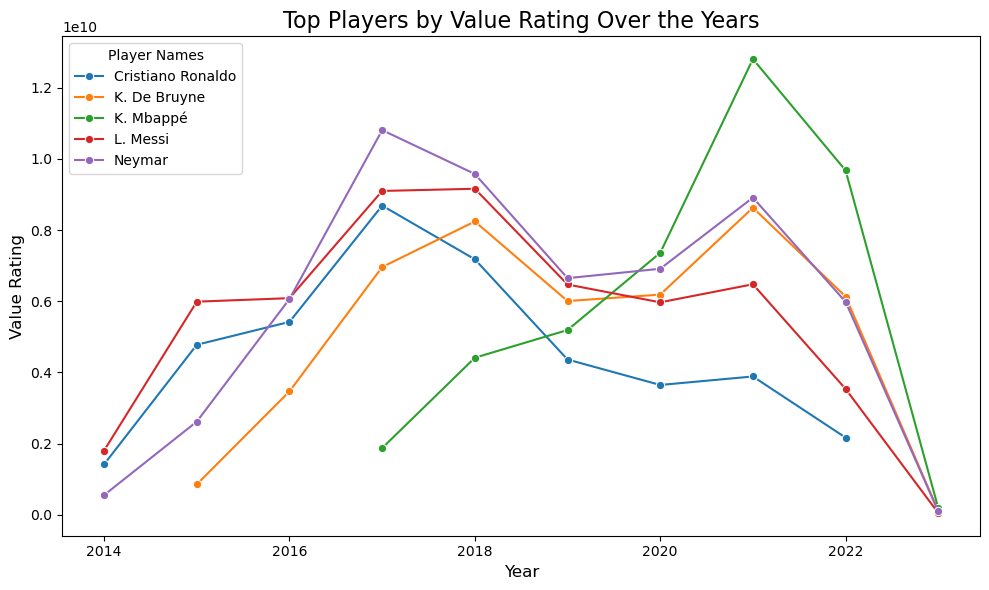

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Data Preparation
df = df_mplayers_overall_years.copy()

df_value_years = (
    df.groupby(['short_name', 'Year'])['value_eur']
    .sum()
    .round(2)
    .reset_index(name='sum_value_eur')
)

df_value = (
    df.groupby('short_name')['value_eur']
    .sum()
    .round(2)
    .reset_index(name='sum_value_eur')
)

df_top_value = df_value.sort_values('sum_value_eur', ascending=False).head(5)
df_top_value_years = df_value_years[df_value_years['short_name'].isin(df_top_value['short_name'])]

# Plotting with Seaborn
plt.figure(figsize=(10, 6))

# Plotting value rating for each top player over the years
sns.lineplot(
    data=df_top_value_years,
    x='Year',
    y='sum_value_eur',
    hue='short_name',
    marker='o'
)

# Customizing the plot
plt.title('Top Players by Value Rating Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value Rating', fontsize=12)
plt.legend(title='Player Names', fontsize=10)
plt.tight_layout()

# Show plot
plt.show()